**Задание**

**Цель:** применить на практике методы по оценке качества данных.

**Описание задания:**

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

**Этапы работы:**

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. *Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.

a) Кратко опишите какие преобразования были сделаны и почему.

b) Сравните метрики моделей из п. 2 и п. 10.

c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.

*Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?
Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

**Результат:** применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

**1. Получите и загрузите данные.**

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.**

In [ ]:
#Уберем категориальные переменные, переменные с типом object (т.к. их нельзя будет использовать
#для моделирования без обработки), а также столбец с id пассажиров

df_train_simple = df_train[['Survived', 'Age', 'Fare']]
df_train_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [ ]:
#Удалим пропущенные значения в полученном датасете
df_train_simple.dropna(inplace=True)
df_train_simple.reset_index(drop=True)
df_train_simple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


<ipython-input-461-2836d2f9ecca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_simple.dropna(inplace=True)


In [ ]:
#Обучим модель
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df_train_simple.loc[:, df_train_simple.columns != 'Survived'] #признаки
y = df_train_simple['Survived'] #Целевая переменная

print(X.shape)
print(y.shape)

(714, 2)
(714,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_simple = LogisticRegression()

In [ ]:
model_simple.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model_simple.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
#Выберем f1-score в качестве метрики качества и посчитаем ее для model_simple
from sklearn.metrics import f1_score

In [ ]:
f1_score_simple = f1_score(y_test, y_pred)
f1_score_simple

#Модель очень плохо справляется с задачей классификации

0.3908045977011494

**3. Снова загрузите полные данные.**


In [ ]:
df_train_full = df_train.copy()
df_train_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.**

В датасете есть признаки, которые вне зависимости от их значений, не могли повлиять на вероятность того, смог выжить пассажир при крушении корабля или нет (с логической точки зрения они никак не влияют на целевую переменную (Survived)).

Такими признаками являются:
- PassengerId (порядковый номер пассажира)
- Name (ФИО)
- Ticket (номер билета)
- Embarked (порт посадки)

Остальные признаки могут быть полезны при построении модели, в связи с чем их целесообразно оставить:
- Survived (целевая переменная, показывающая выжил пассажир или нет)
- Pclass (класс пассажира; возможно, имущественное состояние пассажиров сыграло роль в их спасении)
- Sex (пол пассажира; возможно, женщин спасали первыми, что увеличивало их шансы на спасение)
- Age (возраст пассажира; возможно, детей/стариков спасали первыми, более молодые с большей вероятностью смогли дождаться помощи в условиях холода и т. п.)
- SibSp (количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника; возможно, пассажиров с семьей спасали первыми, или, наоборот, шансы выжить с большой семьей были ниже)
-	Parch (количество родителей, детей (в том числе приемных) на борту титаника; аналогично SibSP)
- Fare (стоимость билета; возможно, богатые имели бОльший шанс на спасение)
-	Cabin (каюта; возможно, расположение каюты могло повлиять на вероятность спасения)


In [ ]:
#Проверим дубликаты, уберем их, если они есть
df_train_full.drop_duplicates(inplace=True)
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Удалим столбцы с нерелевантными признаками
df_train_full.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
df_train_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


**5. Проверьте данные на наличие пропущенных значений.**

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.


In [ ]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
#а) Посчитаем долю пропусков
df_train_full.isna().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
dtype: float64

In [ ]:
#Посчитаем процент пропусков
(df_train_full.isna().sum() / len(df_train_full)).round(2) * 100

Survived     0.0
Pclass       0.0
Sex          0.0
Age         20.0
SibSp        0.0
Parch        0.0
Fare         0.0
Cabin       77.0
dtype: float64

In [ ]:
df_train_full.groupby(['Sex', 'Pclass', 'Survived']).value_counts()

Sex     Pclass  Survived  Age   SibSp  Parch  Fare      Cabin  
female  1       0         2.0   1      2      151.5500  C22 C26    1
                          25.0  1      2      151.5500  C22 C26    1
                          50.0  0      0      28.7125   C49        1
                1         24.0  0      0      69.3000   B35        2
                                              49.5042   C90        1
                                                                  ..
male    3       0         19.0  0      0      7.6500    F G73      1
                          25.0  0      0      7.6500    F G73      1
                          42.0  0      0      7.6500    F G63      1
                1         6.0   0      1      12.4750   E121       1
                          32.0  0      0      8.0500    E10        1
Name: count, Length: 184, dtype: int64

Если просто удалим пропущенные значения, то, как минимум,
потеряем около 77% данных (за счет признака Cabin, содержащего
очень много пропусков).

Заполним пропуски в столбцах Age и Cabin

In [ ]:
#Заполним пропуски в Age средним значением в разрезе пола, класса пассажиров и значения параметра Survived
df_train_full['Age'] = df_train_full['Age'].fillna(df_train_full.groupby(['Sex', 'Pclass', 'Survived'])['Age'].transform('mean'))
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
#Для пропусков в Cabin создадим отдельную категорию (так как пропусков очень много,
#и их корректное заполнение на основе имеющихся данных невозможно)
df_train_full.Cabin = df_train_full.Cabin.fillna('not_indicated')

In [ ]:
df_train_full.loc[df_train_full['Cabin'] == 'not_indicated'][:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.000000,1,0,7.2500,not_indicated
2,1,3,female,26.000000,0,0,7.9250,not_indicated
4,0,3,male,35.000000,0,0,8.0500,not_indicated
5,0,3,male,27.255814,0,0,8.4583,not_indicated
7,0,3,male,2.000000,3,1,21.0750,not_indicated
8,1,3,female,27.000000,0,2,11.1333,not_indicated
9,1,2,female,14.000000,1,0,30.0708,not_indicated
12,0,3,male,20.000000,0,0,8.0500,not_indicated
13,0,3,male,39.000000,1,5,31.2750,not_indicated
14,0,3,female,14.000000,0,0,7.8542,not_indicated


In [ ]:
df_train_full.info()
#Датафрейм теперь не содержит пропусков и готов к использованию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.**


In [ ]:
#Посмотрим на уникальные значения в категориальных переменных
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin']

for col in cols:
    print(f'{col}: {df_train_full[col].unique()}')

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Cabin: ['not_indicated' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27'
 'B78' 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12'
 'D26' 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19'
 'A7' 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35'
 'C87' 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D'
 'C22 C26' 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32'
 'B18' 'C124' 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98'
 'E10' 'E44' 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37'
 'C30' 'D20' 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70'
 'A16' 'C101' 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50'
 'A26' 'D48' 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63'
 'C62 C64' 'E24' 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11'
 'E77' 'F38' 'B3' 'D6' 'B82 B84'

In [ ]:
len(df_train_full[col].unique())

148

Признак Cabin содержит слишком много значений.

Создадим два датафрема (с признаком Cabin и без него), чтобы сравнить качество модели.

Возможно, столь большое количество признаков может навредить модели.

*Таблица с Cabin*

In [ ]:
#Все категориальные переменные, кроме Survived, преобразуем через get_dummies

df_train_full_with_cabin = pd.get_dummies(df_train_full, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin'])

In [ ]:
df_train_full_with_cabin.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_not_indicated
0,0,22.0,7.2500,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1,38.0,71.2833,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1,26.0,7.9250,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,1,35.0,53.1000,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,35.0,8.0500,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_train_full_with_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 170 entries, Survived to Cabin_not_indicated
dtypes: bool(167), float64(2), int64(1)
memory usage: 166.3 KB


*Таблица без Cabin*

In [ ]:
cols_no_cabin = ['Pclass', 'Sex', 'SibSp', 'Parch']

In [ ]:
df_train_full_no_cabin = pd.get_dummies(df_train_full, columns=cols_no_cabin)

In [ ]:
df_train_full_no_cabin.drop('Cabin', axis=1, inplace=True)

In [ ]:
df_train_full_no_cabin.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22.0,7.2500,False,False,True,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
1,1,38.0,71.2833,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,1,26.0,7.9250,False,False,True,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,1,35.0,53.1000,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0,35.0,8.0500,False,False,True,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
df_train_full_no_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    bool   
 4   Pclass_2    891 non-null    bool   
 5   Pclass_3    891 non-null    bool   
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
 8   SibSp_0     891 non-null    bool   
 9   SibSp_1     891 non-null    bool   
 10  SibSp_2     891 non-null    bool   
 11  SibSp_3     891 non-null    bool   
 12  SibSp_4     891 non-null    bool   
 13  SibSp_5     891 non-null    bool   
 14  SibSp_8     891 non-null    bool   
 15  Parch_0     891 non-null    bool   
 16  Parch_1     891 non-null    bool   
 17  Parch_2     891 non-null    bool   
 18  Parch_3     891 non-null    bool   
 19  Parch_4     891 non-null    b

**7. Проверьте данные на наличие выбросов.**

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.



У нас есть 2 числовых признака (Age и Fare), которые мы можем проверить на выбросы

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Распределение признака Age')

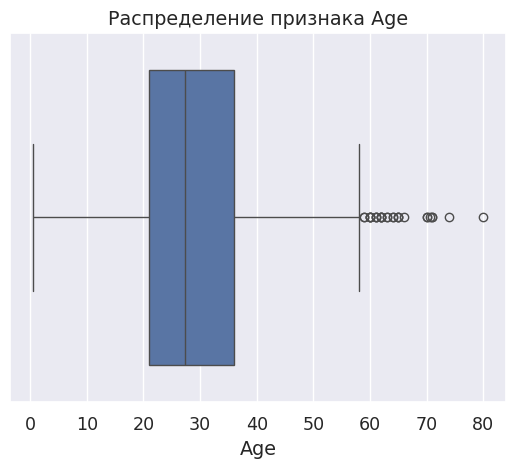

In [ ]:
sns.boxplot(x='Age', data=df_train_full_with_cabin)
plt.title('Распределение признака Age')

Text(0.5, 1.0, 'Распределение признака Fare')

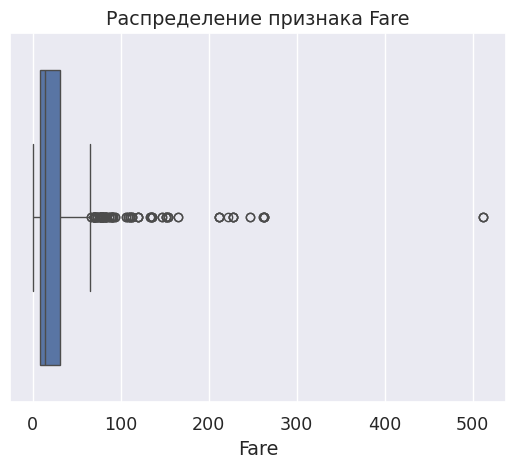

In [ ]:
sns.boxplot(x='Fare', data=df_train_full_with_cabin)
plt.title('Распределение признака Fare')

Оба графика показали наличие выбросов.

Вместе с тем избавляться от выбросов в настоящем случае не следует, поскольку:

1) Выбросы по возрасту не являются какими-либо аномалиями в действительности.

Возраст самого пожилого пассажира около 80 лет, что вполне возможно.

Людей >60 лет на корабле было не так много в сравнении с общим количеством пассажиров, что тоже разумно.

При этом наличие в выборке значений с такими выбросами не должно помешать модели при классификации, поскольку именно возраст пассажира (в частности, пенсионный) мог играть ключевую роль в спасении людей.

2) Выбросы по стоимости билета в настоящем случае также нельзя считать аномалиями, поскольку стоимость билетов во многом отражает и финансовый статус пассажира (дорогой билет - высший класс каюты/обслуживания).

Значения с выбросами должны помочь модели найти связь между спасением и финансовым статусом пассажиров.



**8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)**


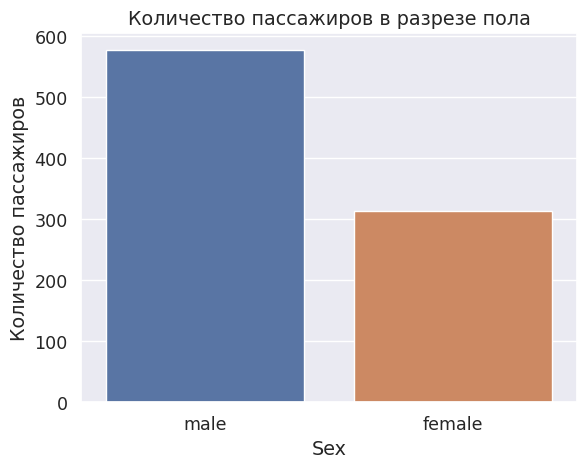

In [ ]:
#Посмотрим на количественное соотношение мужчин и женщин на борту
sns.countplot(data=df_train_full, x="Sex", hue = 'Sex')
plt.title("Количество пассажиров в разрезе пола")
plt.ylabel("Количество пассажиров")
plt.show()

Перед крушением на борту находилось больше мужчин, чем женщин (почти в два раза).

Посмотрим, что изменилось после трагедии.

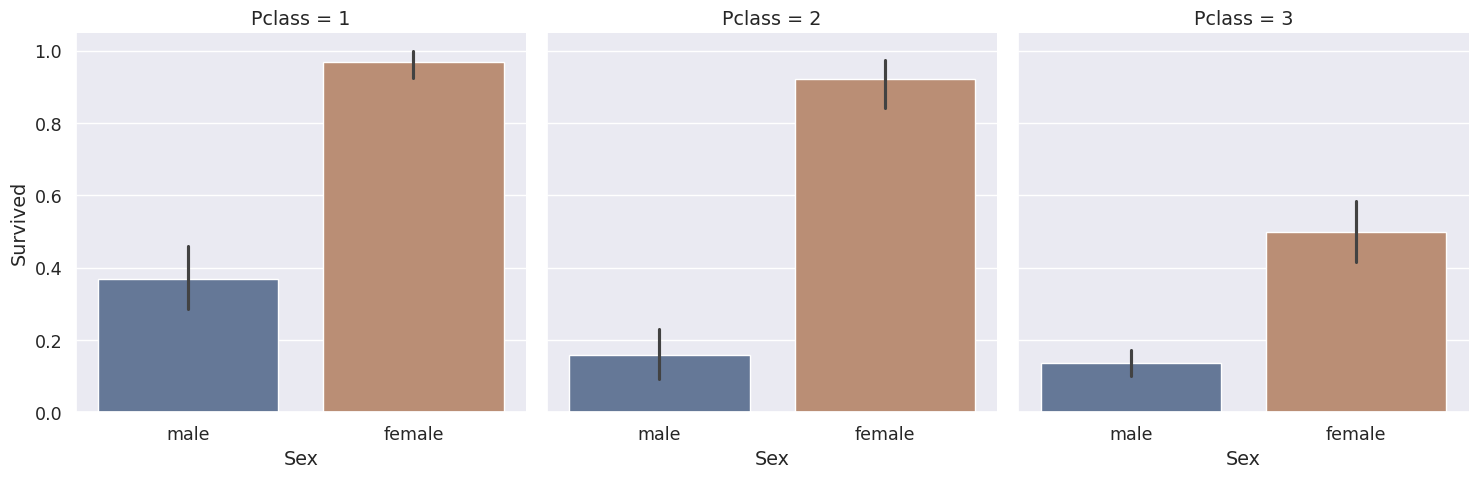

In [ ]:
sns.catplot(data = df_train_full,
            y='Survived',
            x='Sex',
            hue='Sex',
            col='Pclass',
            #palette='bright',
            kind='bar',
            legend=False,
            saturation=0.5)

Как видно из графиков, среди выживших пассажиров большинство были женщинами.
То есть для женщин вероятность спасения была выше, чем для мужчин.

Таким образом, в рамках нашей модели весовой коэффициент для признака Sex применительно к female должен быть выше, чем у male.

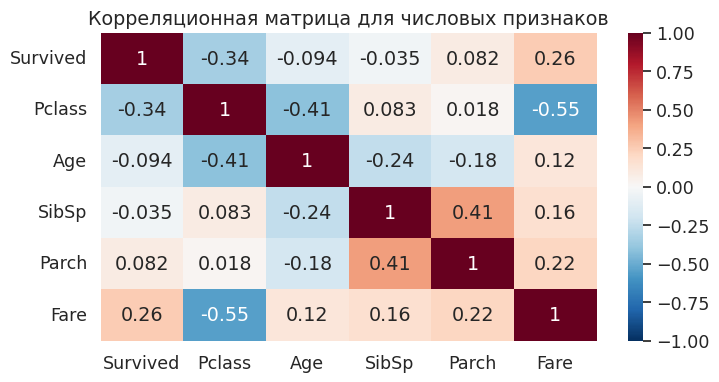

In [ ]:
#Построим тепловую корреляционную матрицу

sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df_train_full[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1).set(title='Корреляционная матрица для числовых признаков'); # указывает начало цветовых кодов от -1 до 1.

Как видно из корреляционной матрицы, каких-либо линейных зависимостей не прослеживается за исключением:

1) P-class и Fare.

Ранжирование класса представлено от 1 до 3, где 1 (высший класс), поэтому имеем знак минус. Можно сказать, что чем дороже билет, тем выше класс, что логично.

2) P-class и Age.

Чем старше пассажир, тем более вероятно, что у него и выше класс. Хотя корреляция слабая.

3) SibSp и Parch.

Оба показателя отвечают за наличие родственников на борту, поэтому логично, что прослеживается какая-то связь между ними.

**9. *Попробуйте математически преобразовать признак Age.**

In [ ]:
#Посмотрим на базовые статистики данного признака
df_train_full['Age'].describe()

count    891.000000
mean      29.339313
std       13.370271
min        0.420000
25%       21.000000
50%       27.255814
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#Признак Age можно искусственно разбить на следующие категории:
df_train_full_age_category = df_train_full.copy()

In [ ]:
df_train_full_age_category['Age_category'] = pd.qcut(df_train_full_age_category.Age, 7)

In [ ]:
df_train_full_age_category['Age_category'].value_counts()

Age_category
(0.419, 18.0]     141
(27.0, 29.0]      134
(22.0, 27.0]      132
(29.0, 35.0]      129
(35.0, 44.582]    123
(18.0, 22.0]      117
(44.582, 80.0]    115
Name: count, dtype: int64

Данный признак Age_category можно также преобразовать через OHE/get_dummies и попробовать обучить модель уже с категориальными данными признака Age

**10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.**


В рамках данной задачи построим две модели с датасетами (так как ранее мы предполагали, что разбивка Cabin на десятки признаков может навредить модели):
- df_train_full_with_cabin
- df_train_full_no_cabin

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
model_with_cabin = make_pipeline(
                      StandardScaler(),
                      LogisticRegression(max_iter=1000)
                      )

model_no_cabin = make_pipeline(
                      StandardScaler(),
                      LogisticRegression(max_iter=1000)
                      )

**model_with_cabin**

In [ ]:
X = df_train_full_with_cabin.loc[:, df_train_full_with_cabin.columns != 'Survived'] #признаки
y = df_train_full_with_cabin['Survived'] #Целевая переменная

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_with_cabin.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = model_with_cabin.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [ ]:
f1_score_with_cabin = f1_score(y_test, y_pred)
f1_score_with_cabin

0.7391304347826085

**model_no_cabin**

In [ ]:
X = df_train_full_no_cabin.loc[:, df_train_full_no_cabin.columns != 'Survived'] #признаки
y = df_train_full_no_cabin['Survived'] #Целевая переменная

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_no_cabin.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = model_no_cabin.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [ ]:
f1_score_no_cabin = f1_score(y_test, y_pred)
f1_score_no_cabin

0.7669172932330827

**Попробуем, используя таблицу df_train_full_no_cabin, преобразовать Age согласно п. 9 ДЗ, и построить модель с учетом данного признака**

In [ ]:
df_train_full_no_cabin['Age_category'] = pd.qcut(df_train_full_no_cabin.Age, 7)

In [ ]:
df_train_full_no_cabin['Age_category'].value_counts()

Age_category
(0.419, 18.0]     141
(27.0, 29.0]      134
(22.0, 27.0]      132
(29.0, 35.0]      129
(35.0, 44.582]    123
(18.0, 22.0]      117
(44.582, 80.0]    115
Name: count, dtype: int64

In [ ]:
df_train_full_no_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Age           891 non-null    float64 
 2   Fare          891 non-null    float64 
 3   Pclass_1      891 non-null    bool    
 4   Pclass_2      891 non-null    bool    
 5   Pclass_3      891 non-null    bool    
 6   Sex_female    891 non-null    bool    
 7   Sex_male      891 non-null    bool    
 8   SibSp_0       891 non-null    bool    
 9   SibSp_1       891 non-null    bool    
 10  SibSp_2       891 non-null    bool    
 11  SibSp_3       891 non-null    bool    
 12  SibSp_4       891 non-null    bool    
 13  SibSp_5       891 non-null    bool    
 14  SibSp_8       891 non-null    bool    
 15  Parch_0       891 non-null    bool    
 16  Parch_1       891 non-null    bool    
 17  Parch_2       891 non-null    bool    
 18  Parch_3   

In [ ]:
df_train_full_no_cabin = pd.get_dummies(df_train_full_no_cabin, columns=['Age_category'])

In [ ]:
#df_train_full_no_cabin.drop('Age', axis=1, inplace=True)

In [ ]:
df_train_full_no_cabin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Survived                     891 non-null    int64  
 1   Age                          891 non-null    float64
 2   Fare                         891 non-null    float64
 3   Pclass_1                     891 non-null    bool   
 4   Pclass_2                     891 non-null    bool   
 5   Pclass_3                     891 non-null    bool   
 6   Sex_female                   891 non-null    bool   
 7   Sex_male                     891 non-null    bool   
 8   SibSp_0                      891 non-null    bool   
 9   SibSp_1                      891 non-null    bool   
 10  SibSp_2                      891 non-null    bool   
 11  SibSp_3                      891 non-null    bool   
 12  SibSp_4                      891 non-null    bool   
 13  SibSp_5             

In [ ]:
model_no_cabin_2 = LogisticRegression(max_iter=1000)

In [ ]:
X = df_train_full_no_cabin.loc[:, df_train_full_no_cabin.columns != 'Survived'] #признаки
y = df_train_full_no_cabin['Survived'] #Целевая переменная

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model_no_cabin_2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
f1_score_no_cabin_2 = f1_score(y_test, y_pred)
f1_score_no_cabin_2

0.7669172932330827

In [ ]:
#Соберем модели и метрики в одну таблицу
df_metrics = pd.DataFrame({'Model': ['Model_simple', 'Model_with_cabin', 'Model_no_cabin', 'Model_no_cabin_2'],
                           'f1_score': [f1_score_simple, f1_score_with_cabin, f1_score_no_cabin, f1_score_no_cabin_2]
                           })
df_metrics

,Model,f1_score
0,Model_simple,0.390805
1,Model_with_cabin,0.739130
2,Model_no_cabin,0.766917
3,Model_no_cabin_2,0.766917


**11. Сформулируйте выводы по проделанной работе.**

**a) Кратко опишите какие преобразования были сделаны и почему.**

В данной работе:

1) проведен анализ признаков, "отброшены" нерелевантные признаки

2) проведен анализ признаков с пропущенными значениями, пропущенные значения заполненены наиболее подходящими (средним для Age в разрезе нескольких групп, для Cabin созадано отдельное значение для пропущенных значений 'not_indicated')

3) Категориальные переменные преобразованы в цифровые значения с помощью pd.get_dummies

4) Числовые признаки проверены на наличие выбросов. Несмотря на их формальное наличие, выбросы не являются аномалиями, значения признаков оставлены как есть.

5) Проведена категоризация признака age (признак разбит на 7 групп).

6) Построено и обучено 4 модели:
- 'model_simple' - самая простая модель, без категориальных признаков и пропущенных значений
- 'Model_with_cabin' - модель с большим количеством признаков (из-за кодирования Cabin),
- 'Model_no_cabin' - модель с умеренным количеством признаков (без признака Cabin),
- 'Model_no_cabin_2' - модель с умеренным количеством признаков (без признака Cabin), без стандартизации, с признаком Age_category вместо Age.

Для каждой модели посчитана метрика f1-score.


**b) Сравните метрики моделей из п. 2 и п. 10.**

Метрики данных моделей отличаются.

При этом Model_no_cabin показала наилучшее качество по метрике f1-score.

Замена Age на Age_catagory (и его последующее кодирование) не изменили f1-score (Model_no_cabin и Model_no_cabin_2).

**c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения.**

Работа с данными, их предобработка (заполнение пропусков, кодирование признаков, комбинирование признаков  т.п.) может существенно повысить качество модели (в нашем случае почти в 2 раза).

Вместе с тем, как показало исследование, много признаков не гарантирует лучший результат, что видно из Model_with_cabin (более 170 признаков) и Model_no_cabin (чуть больше 20 признаков).

***Нужно ли аналогичным образом исследовать и дополнять действительно большие данные?**

Если доля пропусков в сравнении со всеми данными мала, то их заполнение может быть нецелесообразным. Эффективным решением будет их простое удаление, поскольку отсутствие таких значений не скажется на качестве модели.